In [3]:
#Load libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

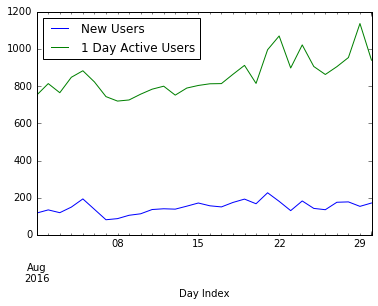

In [5]:
#Load tables
n_days=30
new_users = pd.read_csv("Analytics Mobile Data New Users 20160801-20160831.csv", parse_dates=[0], thousands=',', skiprows=5, index_col=0, nrows=n_days)
active_users = pd.read_csv("Analytics Mobile Data Active Users 20160801-20160831.csv",  parse_dates=[0], thousands=',', skiprows=5, index_col=0, nrows=n_days)

l1 = new_users.plot()
l2 = active_users.plot(ax=l1)
plt.show()


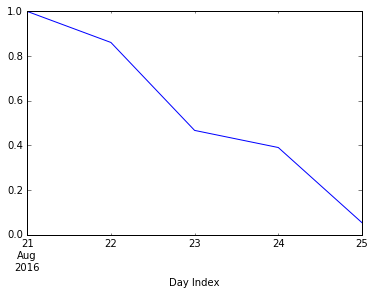

Lifetime value:  2.244473342  days


In [6]:
#Select day for analysis
day=20

from scipy import integrate

data_new=new_users[day:]
data_all=active_users[day:]

data_cum_sum=data_new.apply(np.cumsum)
retention = data_all['1 Day Active Users'] - data_cum_sum['New Users']

retention = retention/retention.max()
retention = retention[retention > -0.01]

retention.plot()
plt.show()

#Numerically integrate the time series.
print ("Lifetime value: ", integrate.trapz(retention.values), " days")



# Подгонка кривой

Твои параметры p0, p1, p2, p3: [  0.66984127 -10.24656085   8.63174603  -0.91851852]


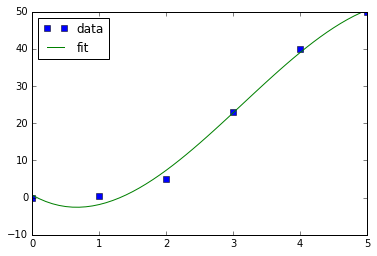

In [23]:
#Любая функция тут
model_curve = lambda x, p0, p1, p2, p3: p0+p1*x+p2*x*x+p3*x*x*x


#http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit

#Данные можно считать из файла или ввести вручную
xdata=np.array([0, 1, 2, 3, 4, 5])
ydata=np.array([0, 0.4, 5, 23, 40, 50])

you_guess=[1, 1, 1, 1 ] #for p0, p1, p2, p3

popt, pcov = curve_fit(model_curve, xdata, ydata, p0=you_guess)

#print results
print ("Твои параметры p0, p1, p2, p3:",popt)

#Plot data
l1 = plt.plot(xdata, ydata, "s", label = "data")
l2 = plt.plot(np.arange(0,5,0.1), model_curve(np.arange(0,5,0.1), *(popt)), label = "fit")
plt.legend(loc=0)
plt.show()